# Supervised Learning: Linear Regression

### Import required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
df = pd.read_csv("ford.csv")

display(df.head())
print(df.shape)

,model,fuelType,price,transmission,mileage,fuelType.1,mpg,engineSize,year
0,Fiesta,Petrol,12000,Automatic,15944,Petrol,57.7,1.0,2017
1,Focus,Petrol,14000,Manual,9083,Petrol,57.7,1.0,2018
2,Focus,Petrol,13000,Manual,12456,Petrol,57.7,1.0,2017
3,Fiesta,Petrol,17500,Manual,10460,Petrol,40.3,1.5,2019
4,Fiesta,Petrol,16500,Automatic,1482,Petrol,48.7,1.0,2019


(17964, 9)


### Data Preprocessing

In [3]:
#####  Label Encoding

In [4]:
print(df['model'].unique())
print(len(df['model'].unique()))

print(df['transmission'].unique())
print(df['fuelType'].unique())


[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo']
23
['Automatic' 'Manual' 'Semi-Auto']
['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']


In [5]:
df['model'] = df['model'].replace({' Fiesta':0, ' Focus':1, ' Puma':2, ' Kuga':3, ' EcoSport':4, ' C-MAX':5, ' Mondeo':6, ' Ka+':7, ' Streetka':8, ' Escort':9,
                                    ' Tourneo Custom':10, ' S-MAX':11, ' B-MAX':12, ' Edge':13, ' Tourneo Connect':14, ' Grand C-MAX':15, ' Transit Tourneo':16, ' Ranger':17, 
                                    ' KA':18, ' Galaxy':19, ' Mustang':20, ' Grand Tourneo Connect':21, ' Fusion':22})

df['transmission'] = df['transmission'].replace({'Manual':0, 'Automatic':1, 'Semi-Auto':2 })
df['fuelType'] = df['fuelType'].replace({'Petrol':0, 'Diesel':1, 'Hybrid':2 ,'Electric':3,'Other':4})


display(df.head())
# list(data) or
print("The Columns are: \n" , df.columns)

,model,fuelType,price,transmission,mileage,fuelType.1,mpg,engineSize,year
0,0,0,12000,1,15944,Petrol,57.7,1.0,2017
1,1,0,14000,0,9083,Petrol,57.7,1.0,2018
2,1,0,13000,0,12456,Petrol,57.7,1.0,2017
3,0,0,17500,0,10460,Petrol,40.3,1.5,2019
4,0,0,16500,1,1482,Petrol,48.7,1.0,2019


The Columns are: 
 Index(['model', 'fuelType', 'price', 'transmission', 'mileage', 'fuelType.1',
       'mpg', 'engineSize', 'year'],
      dtype='object')


### Separating the features and target variable

In [6]:
features = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'mpg', 'engineSize']
target = ['price']

X = df[features]
y = df[target]

print(X.shape, y.shape)

(17964, 7) (17964, 1)


### Create train and test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14371, 7) (3593, 7) (14371, 1) (3593, 1)


### Linear Regression

##### Training with Linear Regression

In [8]:
model = LinearRegression()
model = model.fit(X_train, y_train)

##### Linear Regression Coefficients and intercept

In [9]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
5,mpg,-112.982560
0,model,-6.272005
3,mileage,-0.055536
2,transmission,392.075701
1,year,1263.284929
4,fuelType,1415.310485
6,engineSize,4106.225446


In [10]:
model.intercept_

array([-2533827.8826546])

### Prediction

In [11]:
y_pred = model.predict(X_test)

### Prediction Error

In [12]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
MSE = mean_squared_error(y_test, y_pred, squared=True)
MAE = mean_absolute_error(y_test, y_pred)
MAPE = mean_absolute_percentage_error(y_test, y_pred)

print("RMSE:", RMSE)
print("MSE:", MAE)
print("MAE:", MAE)
print("MAPE:", MAPE)

RMSE: 2415.0484747396044
MSE: 1726.288439735211
MAE: 1726.288439735211
MAPE: 0.17907850757907265


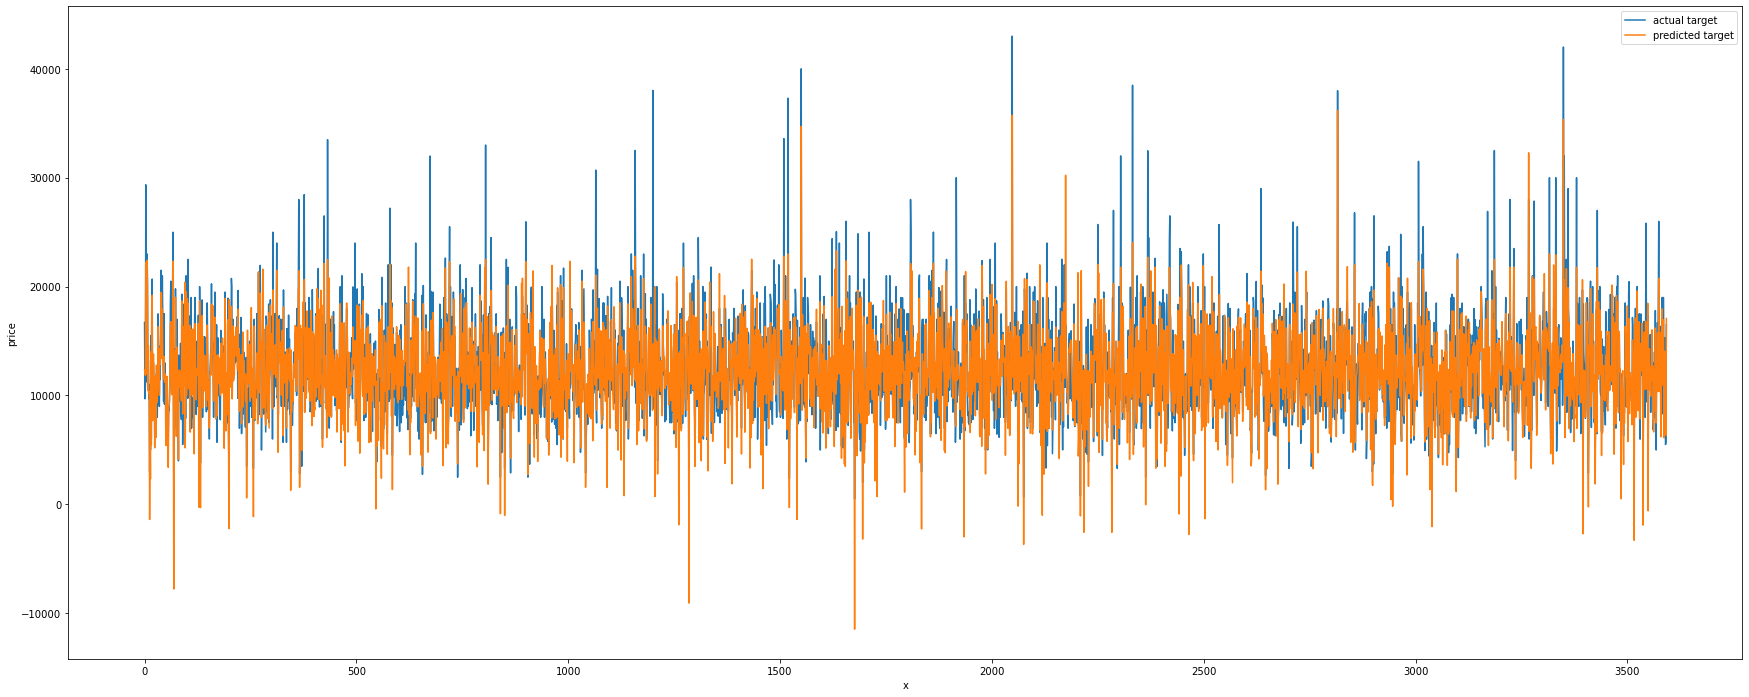

In [13]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()